--- Starting Task 1: Sampling and Reconstruction ---


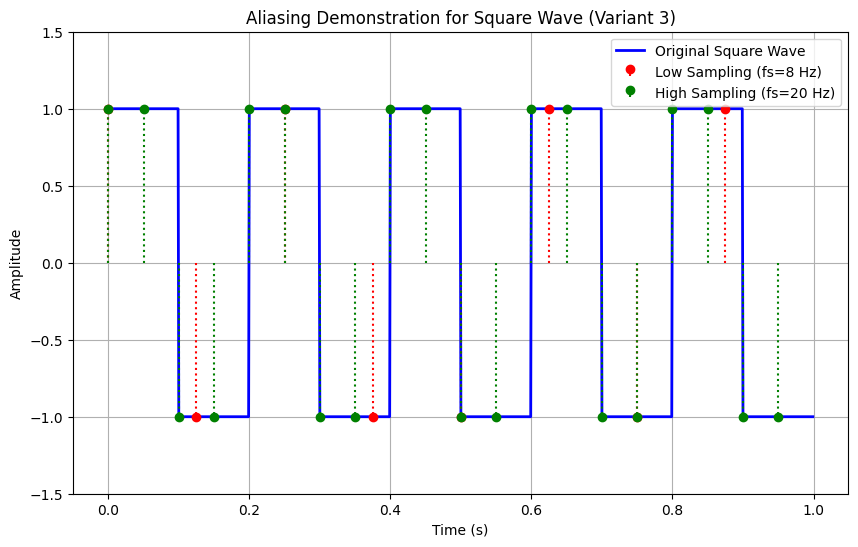

--- Task 1 completed ---

--- Starting Task 2: Delta Coding and Decoding ---
Original Signal: [ 3  6  9  9 12]
Encoded Signal: [0. 3. 3. 0. 3.]
Decoded Signal: [0. 3. 6. 6. 9.]
--- Task 2 completed ---


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square


print("--- Starting Task 1: Sampling and Reconstruction ---")


f_signal = 5  # Frequency of the square wave (Hz)
# High-resolution time vector for the original continuous signal
t_continuous = np.linspace(0, 1, 1000, endpoint=False)
original_signal = square(2 * np.pi * f_signal * t_continuous) # Original square wave


f_sample_low = 8 
f_sample_high = 20

# --- Sampling the Signal ---
# Sampling the signal at a low frequency
t_low = np.arange(0, 1, 1 / f_sample_low) # Time points for the low sampling rate
samples_low = square(2 * np.pi * f_signal * t_low) # Sampled signal at low frequency

# Sampling the signal at a high frequency
t_high = np.arange(0, 1, 1 / f_sample_high) # Time points for the high sampling rate
samples_high = square(2 * np.pi * f_signal * t_high) # Sampled signal at high frequency

# --- Visualization of Sampling Effects ---
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, original_signal, label='Original Square Wave', linewidth=2, color='blue')
# Stem plot for low sampling
plt.stem(t_low, samples_low, linefmt='r:', markerfmt='ro', basefmt=" ", 
         label=f'Low Sampling (fs={f_sample_low} Hz)') 
# Stem plot for high sampling
plt.stem(t_high, samples_high, linefmt='g:', markerfmt='go', basefmt=" ", 
         label=f'High Sampling (fs={f_sample_high} Hz)') 
plt.title('Aliasing Demonstration for Square Wave (Variant 3)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.ylim(-1.5, 1.5) # Adjust Y-axis range for better visualization of the square wave
plt.show()

print("--- Task 1 completed ---")


print("\n--- Starting Task 2: Delta Coding and Decoding ---")

# --- Delta Encoding and Decoding Functions ---
def delta_encode(signal):
    """
    Encodes a signal using delta coding.
    Preserves the first sample as is, and subsequent elements
    are the differences from the previous sample.
    """
    # np.insert(signal, 0, signal[0]) ensures the first element is preserved as the base.
    # np.diff then calculates the differences.
    return np.diff(np.insert(signal.astype(float), 0, signal[0]))

def delta_decode(encoded_signal):
    """
    Decodes a delta-encoded signal to reconstruct the original.
    Performs a cumulative sum.
    """
    return np.cumsum(encoded_signal)


# Signal for Variant 3: Encode and decode the signal [3, 6, 9, 9, 12]
original_signal_delta = np.array([3, 6, 9, 9, 12])

# Encode the signal
encoded_signal_delta = delta_encode(original_signal_delta)

# Decode the signal
decoded_signal_delta = delta_decode(encoded_signal_delta)

# Print results to console
print("Original Signal:", original_signal_delta)
print("Encoded Signal:", encoded_signal_delta)
print("Decoded Signal:", decoded_signal_delta)

print("--- Task 2 completed ---")